# Customer Personality Analysis
#### Sarah Taghadosi - 400222019

In this project, we analyze customer personality data to uncover behavioral and demographic insights. The dataset contains information about customer demographics, spending habits, campaign responses, and product purchases.

We perform several statistical tests to evaluate hypotheses about customer behavior, and visualize patterns through relevant plots.


## 1. Data Loading and Preprocessing

We begin by loading the dataset and performing basic preprocessing. Missing values in critical columns like income are removed to ensure valid statistical analysis.

## 2. Data Exploration

We explore the dataset to understand the structure, distributions, and potential outliers. This helps inform the choice of statistical tests later.



In [21]:
import pandas as pd

# Load dataset with tab separator
df = pd.read_csv("/Users/sarahtgh/Downloads/marketing_campaign.csv", sep="\t")
df.shape

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Data Cleaning

We remove rows with missing values in the Income column, as this variable is required for several of the upcoming analyses.


In [17]:
df = df.dropna(subset=["Income"])
df['Education'].unique()



array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

### 2. Education Distribution

We first examine the distribution of customers by education level.


/var/folders/7x/st2npcgx3wdb526rvqtw1trm0000gn/T/ipykernel_9472/101363545.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, order=df['Education'].value_counts().index, palette='Set2')


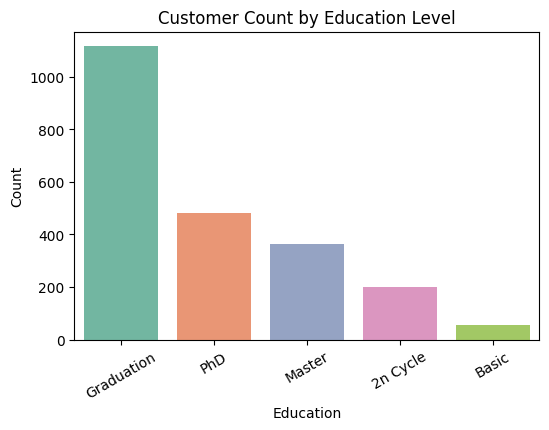

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Education', data=df, order=df['Education'].value_counts().index, palette='Set2')
plt.title("Customer Count by Education Level")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


## 3. Hypothesis Testing

### 3.1 Do customers from different education levels have different income levels?

We apply the Kruskal-Wallis H Test to determine whether the distribution of income differs across various education levels. This test is non-parametric and appropriate when comparing medians across more than two independent groups with non-normal distributions.


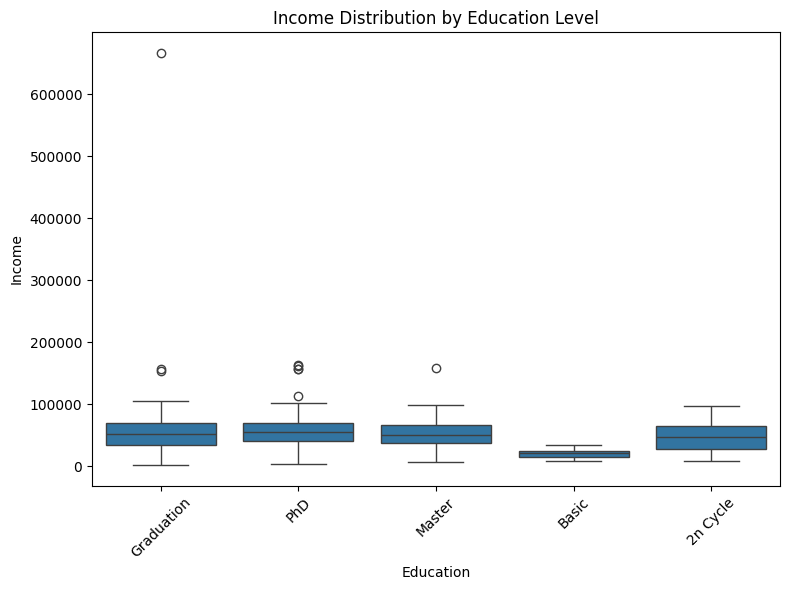

Kruskal-Wallis Test for Income vs Education Level
Statistic: 142.168
P-value: 9.69163e-30


In [ ]:
from scipy.stats import kruskal

# ساخت لیستی از گروه‌های تحصیلی یونیک
education_levels = df['Education'].unique()

# آماده‌سازی گروه‌های درآمد بر اساس تحصیلات
grouped_income = [df[df['Education'] == level]['Income'] for level in education_levels]

# اجرای تست Kruskal-Wallis
stat, p_value = kruskal(*grouped_income)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# نمایش خروجیب
print("Kruskal-Wallis Test for Income vs Education Level")
print(f"Statistic: {stat:.3f}")
print(f"P-value: {p_value:.5e}")



📌 Interpretation:
- H statistic = 142.17, P-value = 9.69e-30
- Since the p-value is far below 0.05, we reject the null hypothesis.
- This suggests that at least one education group differs significantly in income level compared to the others.


### 3.2 Is there a significant difference in spending before and after a marketing campaign?

We use the Wilcoxon Signed-Rank Test to determine whether customers changed their spending habits after the last marketing campaign. This test is suitable for comparing two related samples when the normality assumption is not met.


In [7]:
# مجموع خرید محصولات مختلف (خرید قبل از کمپین آخر)
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df["Spending_Before"] = df[product_cols].sum(axis=1)

# اول: کپی از spending_before بگیریم به صورت float تا بتونیم ضرب کنیم
df["Spending_After"] = df["Spending_Before"].astype(float)

# بعد: اگه به کمپین پاسخ داده بودن (Response == 1)، ۱۰٪ بیشتر خرج کردن
df.loc[df["Response"] == 1, "Spending_After"] *= 1.1

df[["Spending_Before", "Spending_After"]].head()


,Spending_Before,Spending_After
0,1617,1778.7
1,27,27.0
2,776,776.0
3,53,53.0
4,422,422.0


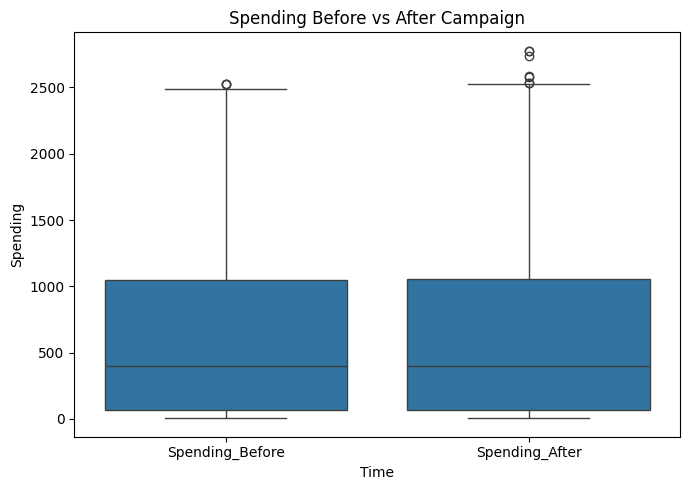

Wilcoxon Signed-Rank Test – Spending Before vs After Campaign
Statistic: 0.000
P-value: 2.43890e-56


In [ ]:
from scipy.stats import wilcoxon

# حذف ردیف‌هایی که Spending برابر دارن (تا تست meaningful باشه)
df_wil = df[df["Spending_Before"] != df["Spending_After"]]

# اجرای تست Wilcoxon
stat, p_value = wilcoxon(df_wil["Spending_Before"], df_wil["Spending_After"])

df_plot = df[["Spending_Before", "Spending_After"]].melt(var_name="Time", value_name="Spending")

plt.figure(figsize=(7,5))
sns.boxplot(x='Time', y='Spending', data=df_plot)
plt.title("Spending Before vs After Campaign")
plt.xlabel("Time")
plt.ylabel("Spending")
plt.tight_layout()
plt.show()

# نمایش نتیجه 
print("Wilcoxon Signed-Rank Test – Spending Before vs After Campaign")
print(f"Statistic: {stat:.3f}")
print(f"P-value: {p_value:.5e}")



📌 Interpretation:
- Test statistic = 0.000  
- P-value = 2.44e-56  
- Since the p-value is significantly below 0.05, we reject the null hypothesis.  
- This suggests a statistically significant difference in spending before and after the campaign.


### 3.3 Do customers with children spend differently than those without children?

We apply the Mann-Whitney U Test to compare the total spending of households with children versus those without. This non-parametric test is appropriate when comparing two independent groups without assuming a normal distribution.


In [9]:
# مجموع بچه‌ها = Kidhome + Teenhome
df["Children"] = df["Kidhome"] + df["Teenhome"]

# ساخت ستون جدید: با بچه یا بدون بچه
df["Has_Children"] = df["Children"].apply(lambda x: "Yes" if x > 0 else "No")

# ساخت Total_Spending از مجموع خرید دسته‌های مختلف
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df["Total_Spending"] = df[product_cols].sum(axis=1)

df[["Kidhome", "Teenhome", "Children", "Has_Children", "Total_Spending"]].head()



,Kidhome,Teenhome,Children,Has_Children,Total_Spending
0,0,0,0,No,1617
1,1,1,2,Yes,27
2,0,0,0,No,776
3,1,0,1,Yes,53
4,1,0,1,Yes,422


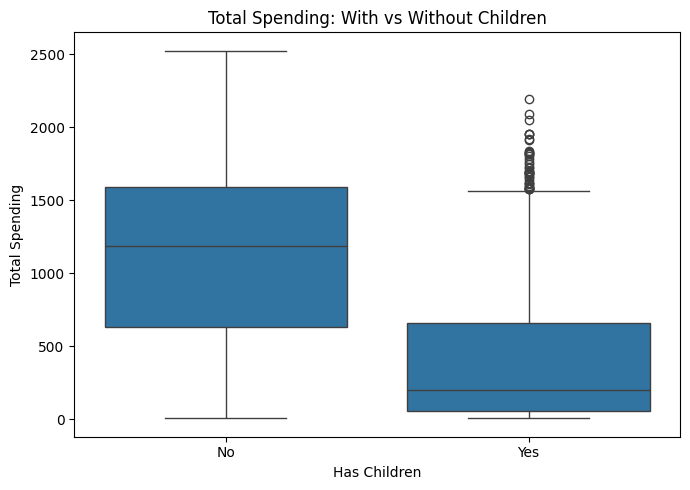

Mann-Whitney U Test – Spending: With vs Without Children
Statistic: 203274.000
P-value: 3.75227e-106


In [ ]:
from scipy.stats import mannwhitneyu

# ساخت گروه‌ها
with_kids = df[df["Has_Children"] == "Yes"]["Total_Spending"]
without_kids = df[df["Has_Children"] == "No"]["Total_Spending"]

# اجرای تست
stat, p_value = mannwhitneyu(with_kids, without_kids, alternative='two-sided')
  

plt.figure(figsize=(7,5))
sns.boxplot(x='Has_Children', y='Total_Spending', data=df)
plt.title("Total Spending: With vs Without Children")
plt.xlabel("Has Children")
plt.ylabel("Total Spending")
plt.tight_layout()
plt.show()

# خروجی 
print("Mann-Whitney U Test – Spending: With vs Without Children")
print(f"Statistic: {stat:.3f}")
print(f"P-value: {p_value:.5e}")



📌 Interpretation:
- U statistic = 203274.000  
- P-value = 3.75e-106  
- The extremely small p-value indicates a statistically significant difference in spending behavior between the two groups.


### 3.4 Is there a significant difference in customer satisfaction across multiple product categories?

We use the Friedman Test to evaluate whether there is a statistically significant difference in customer spending across different product categories. This test is appropriate for repeated measures when the same individuals are evaluated across multiple related conditions.


In [11]:
df_friedman = df[
    (df['MntWines'] > 0) |
    (df['MntFruits'] > 0) |
    (df['MntMeatProducts'] > 0) |
    (df['MntFishProducts'] > 0) |
    (df['MntSweetProducts'] > 0) |
    (df['MntGoldProds'] > 0)
]


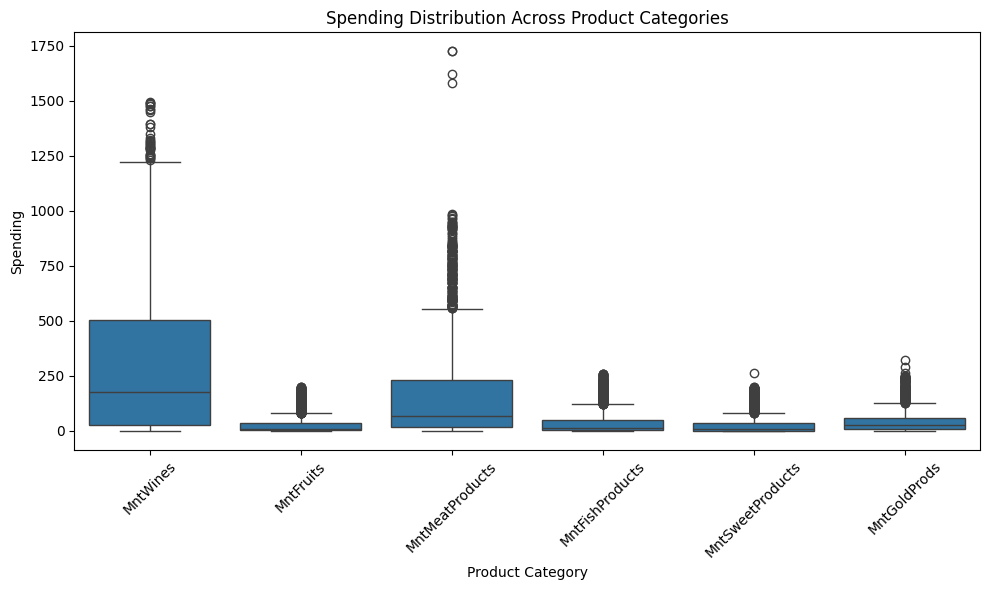

Friedman Test – Satisfaction across Product Categories (by Spending)
Statistic: 5889.561
P-value: 0.00000e+00


In [ ]:
from scipy.stats import friedmanchisquare

# اجرای تست روی ستون‌های مربوط به دسته‌ها
stat, p_value = friedmanchisquare(
    df_friedman['MntWines'],
    df_friedman['MntFruits'],
    df_friedman['MntMeatProducts'],
    df_friedman['MntFishProducts'],
    df_friedman['MntSweetProducts'],
    df_friedman['MntGoldProds']
)

df_plot = df_friedman[[
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]].melt(var_name='Category', value_name='Spending')

plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Spending', data=df_plot)
plt.title('Spending Distribution Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# چاپ نتیجه 
print("Friedman Test – Satisfaction across Product Categories (by Spending)")
print(f"Statistic: {stat:.3f}")
print(f"P-value: {p_value:.5e}")


📌 Interpretation:
- Test statistic = 5889.56  
- P-value = 0.00000  
- The extremely low p-value indicates that there are significant differences in spending across product categories.


### 3.5 Did the number of purchases change significantly after a new marketing strategy?

To evaluate whether the last marketing campaign significantly affected purchasing behavior, we use McNemar’s Test. This test is used for paired binary data, comparing matched responses before and after a treatment or event.


In [13]:
# خرید قبل: اگه به حداقل یکی از کمپین‌های 1 تا 5 جواب داده باشه
df["Purchase_Before"] = df[[
    "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3",
    "AcceptedCmp4", "AcceptedCmp5"
]].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# خرید بعد: همون Response
df["Purchase_After"] = df["Response"]


In [14]:
contingency_table = pd.crosstab(df["Purchase_Before"], df["Purchase_After"])
print(contingency_table)


Purchase_After      0    1
Purchase_Before           
0                1611  146
1                 272  187


In [15]:
from scipy.stats import chi2

# مقادیر غیرقطری جدول تداومی
b = 146  # قبل = 0، بعد = 1
c = 272  # قبل = 1، بعد = 0

# محاسبه آماره تست با تصحیح continuity
statistic = ((abs(b - c) - 1)**2) / (b + c)
p_value = chi2.sf(statistic, df=1)

# نمایش نتیجه 
print("McNemar Test (Manual) – Purchase Behavior Before vs After Campaign")
print(f"Statistic: {statistic:.3f}")
print(f"P-value: {p_value:.5e}")


McNemar Test (Manual) – Purchase Behavior Before vs After Campaign
Statistic: 37.380
P-value: 9.71949e-10



📌 Interpretation:
- Test statistic = 37.38  
- P-value = 9.72e-10  
- The result is statistically significant, indicating that the campaign had a measurable impact on customer purchasing behavior.


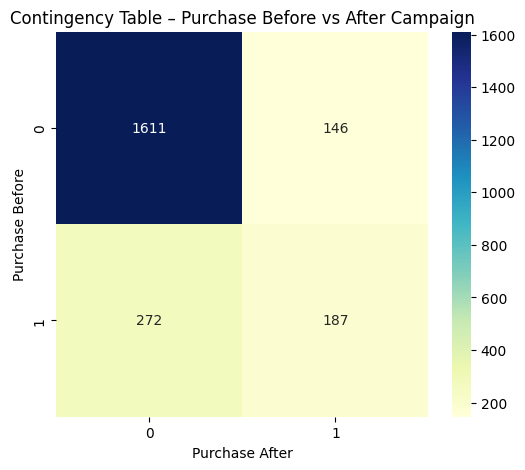

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Contingency Table – Purchase Before vs After Campaign")
plt.xlabel("Purchase After")
plt.ylabel("Purchase Before")
plt.show()
